# Thông tin
* Họ tên: Nguyễn Tuấn Anh
* MSSV: 21520142
* Bài tập: Baitap03
* Ngày thực hiện: 09/10/2023

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
images_path = '/content/drive/MyDrive/CS331.O11.KHTN/Baitap/Baitap3/images'

In [3]:
# Import nescessary libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

In [4]:
import cv2 as cv
import os

In [5]:
module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"
detector = hub.load(module_handle).signatures['default']

In [6]:
# https://gist.github.com/iitzco/3b2ee634a12f154be6e840308abfcab5
LABEL_MAP = {
    0: "unlabeled",
    1: "person",
    2: "bicycle",
    3: "car",
    4: "motorcycle",
    5: "airplane",
    6: "bus",
    7: "train",
    8: "truck",
    9: "boat",
    10: "traffic",
    11: "fire",
    12: "street",
    13: "stop",
    14: "parking",
    15: "bench",
    16: "bird",
    17: "cat",
    18: "dog",
    19: "horse",
    20: "sheep",
    21: "cow",
    22: "elephant",
    23: "bear",
    24: "zebra",
    25: "giraffe",
    26: "hat",
    27: "backpack",
    28: "umbrella",
    29: "shoe",
    30: "eye",
    31: "handbag",
    32: "tie",
    33: "suitcase",
    34: "frisbee",
    35: "skis",
    36: "snowboard",
    37: "sports",
    38: "kite",
    39: "baseball",
    40: "baseball",
    41: "skateboard",
    42: "surfboard",
    43: "tennis",
    44: "bottle",
    45: "plate",
    46: "wine",
    47: "cup",
    48: "fork",
    49: "knife",
    50: "spoon",
    51: "bowl",
    52: "banana",
    53: "apple",
    54: "sandwich",
    55: "orange",
    56: "broccoli",
    57: "carrot",
    58: "hot",
    59: "pizza",
    60: "donut",
    61: "cake",
    62: "chair",
    63: "couch",
    64: "potted",
    65: "bed",
    66: "mirror",
    67: "dining",
    68: "window",
    69: "desk",
    70: "toilet",
    71: "door",
    72: "tv",
    73: "laptop",
    74: "mouse",
    75: "remote",
    76: "keyboard",
    77: "cell",
    78: "microwave",
    79: "oven",
    80: "toaster",
    81: "sink",
    82: "refrigerator",
    83: "blender",
    84: "book",
    85: "clock",
    86: "vase",
    87: "scissors",
    88: "teddy",
    89: "hair",
    90: "toothbrush",
    91: "hair",
    92: "banner",
    93: "blanket",
    94: "branch",
    95: "bridge",
    96: "building",
    97: "bush",
    98: "cabinet",
    99: "cage",
    100: "cardboard",
    101: "carpet",
    102: "ceiling",
    103: "ceiling",
    104: "cloth",
    105: "clothes",
    106: "clouds",
    107: "counter",
    108: "cupboard",
    109: "curtain",
    110: "desk",
    111: "dirt",
    112: "door",
    113: "fence",
    114: "floor",
    115: "floor",
    116: "floor",
    117: "floor",
    118: "floor",
    119: "flower",
    120: "fog",
    121: "food",
    122: "fruit",
    123: "furniture",
    124: "grass",
    125: "gravel",
    126: "ground",
    127: "hill",
    128: "house",
    129: "leaves",
    130: "light",
    131: "mat",
    132: "metal",
    133: "mirror",
    134: "moss",
    135: "mountain",
    136: "mud",
    137: "napkin",
    138: "net",
    139: "paper",
    140: "pavement",
    141: "pillow",
    142: "plant",
    143: "plastic",
    144: "platform",
    145: "playingfield",
    146: "railing",
    147: "railroad",
    148: "river",
    149: "road",
    150: "rock",
    151: "roof",
    152: "rug",
    153: "salad",
    154: "sand",
    155: "sea",
    156: "shelf",
    157: "sky",
    158: "skyscraper",
    159: "snow",
    160: "solid",
    161: "stairs",
    162: "stone",
    163: "straw",
    164: "structural",
    165: "table",
    166: "tent",
    167: "textile",
    168: "towel",
    169: "tree",
    170: "vegetable",
    171: "wall",
    172: "wall",
    173: "wall",
    174: "wall",
    175: "wall",
    176: "wall",
    177: "wall",
    178: "water",
    179: "waterdrops",
    180: "window",
    181: "window",
    182: "wood"
}

In [7]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [8]:
def run_detector(img, detector, path):
  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  result = detector(converted_img)

  result = {key:value.numpy() for key,value in result.items()}

  print("Found %d objects." % len(result["detection_scores"]))

  return result

# Yêu cầu 1
## Phát hiện các vị trí có chứa đối tượng Dog trong ảnh dog01.jpg
* Vị trí (hay được gọi là bounding box) được mô tả gồm 4 giá trị tọa độ : left, top, right, bottom
* Sử dụng mô hình pretrained của MobileNet hoặc VGG,… để xác định loại đối tượng.

## Vẽ các bounding box có chứa đối tượng Dog bằng hình chữ nhật có màu Red

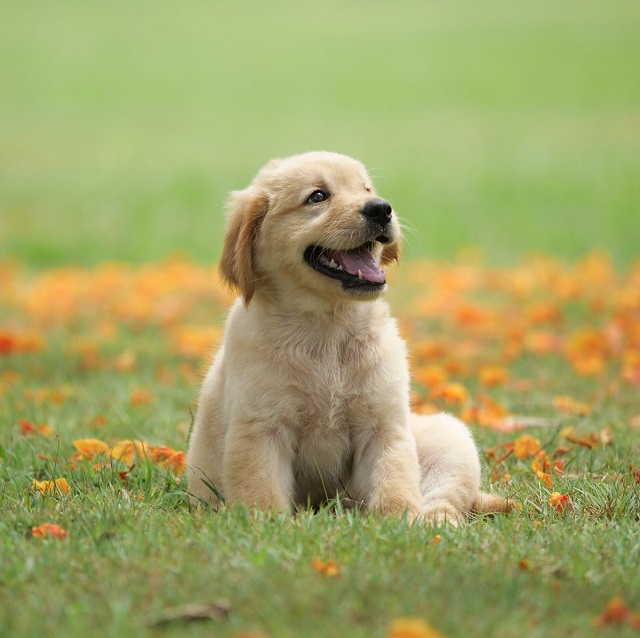

In [9]:
from google.colab.patches import cv2_imshow
dog1_path = os.path.join(images_path, 'dog01.jpg')
img_dog = cv.imread(dog1_path)
cv2_imshow(img_dog)

In [10]:
res = run_detector(img_dog, detector, dog1_path)

Found 100 objects.


In [11]:
# Object có trong ảnh
res['detection_class_entities']

array([b'Dog', b'Polar bear', b'Flower', b'Flower', b'Flower', b'Flower',
       b'Flower', b'Flower', b'Plant', b'Flower', b'Plant', b'Plant',
       b'Flower', b'Plant', b'Plant', b'Flower', b'Plant', b'Plant',
       b'Flower', b'Plant', b'Plant', b'Plant', b'Plant', b'Plant',
       b'Plant', b'Flower', b'Plant', b'Flower', b'Plant', b'Plant',
       b'Plant', b'Plant', b'Plant', b'Plant', b'Flower', b'Flower',
       b'Plant', b'Carnivore', b'Plant', b'Flower', b'Plant', b'Plant',
       b'Flower', b'Plant', b'Plant', b'Plant', b'Plant', b'Plant',
       b'Plant', b'Flower', b'Plant', b'Plant', b'Flower', b'Cat',
       b'Flower', b'Plant', b'Plant', b'Plant', b'Plant', b'Flower',
       b'Plant', b'Plant', b'Plant', b'Plant', b'Plant', b'Plant',
       b'Flower', b'Plant', b'Plant', b'Plant', b'Plant', b'Plant',
       b'Plant', b'Flower', b'Plant', b'Plant', b'Plant', b'Plant',
       b'Flower', b'Plant', b'Plant', b'Plant', b'Plant', b'Plant',
       b'Plant', b'Plant', b'Plant

In [12]:
# Vẽ bounding boxes
for i in range(len(res['detection_class_entities'])):
  cls = res['detection_class_entities'][i]
  bbox = res['detection_boxes'][i]
  y1, x1, y2, x2 = bbox[0], bbox[1], bbox[2], bbox[3]
  x1, x2 = int(x1 * img_dog.shape[1]), int(x2 * img_dog.shape[1])
  y1, y2 = int(y1 * img_dog.shape[0]), int(y2 * img_dog.shape[0])
  if cls.decode() == 'Dog':
    cv.rectangle(img_dog, (x1, y1), (x2, y2), (0, 0, 255), 4)

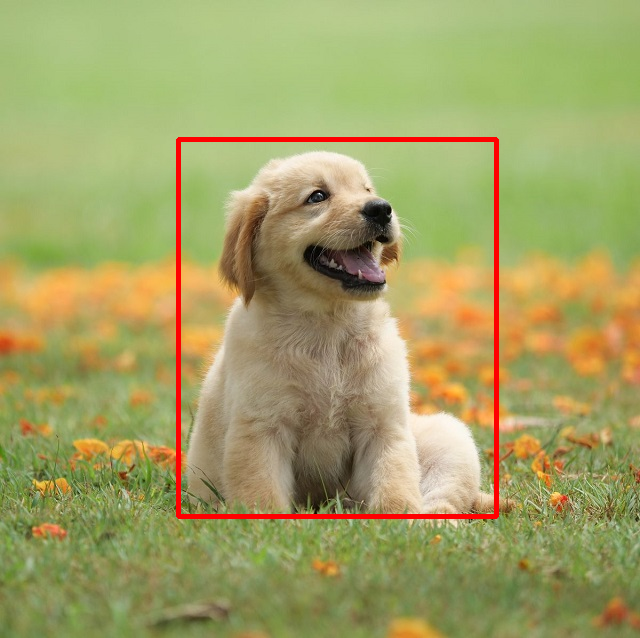

In [13]:
cv2_imshow(img_dog)

# Yêu cầu 2:
## Phát hiện các vị trí có chứa đối tượng Dog, Cat trong ảnh dogcat.jpg
## Vẽ các bounding box có chứa đối tượng Dog bằng hình chữ nhật có màu Red
## Vẽ các bounding box có chứa đối tượng Cat bằng hình chữ nhật có màu Green

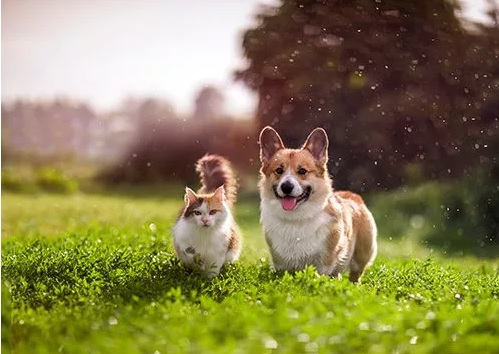

In [14]:
#filename = '/content/drive/MyDrive/CS331.O11.KHTN/Baitap/Baitap3/images/dogcat.jpg'
dogcat_path = os.path.join(images_path, 'dogcat.jpg')

img_dog_cat = cv.imread(dogcat_path)
cv2_imshow(img_dog_cat)

In [15]:
res = run_detector(img_dog_cat, detector, dogcat_path)

for i in range(len(res['detection_class_entities'])):
    score = res['detection_scores'][i]
    cls = res['detection_class_entities'][i]
    bbox = res['detection_boxes'][i]

    y1, x1, y2, x2 = bbox[0], bbox[1], bbox[2], bbox[3]
    x1, x2 = int(x1 * img_dog_cat.shape[1]), int(x2 * img_dog_cat.shape[1])
    y1, y2 = int(y1 * img_dog_cat.shape[0]), int(y2 * img_dog_cat.shape[0])

    if cls.decode() == 'Dog' and score >= 0.5:
        cv.rectangle(img_dog_cat, (x1, y1), (x2, y2), (0, 0, 255), 4)
    if cls.decode() == 'Cat':
        cv.rectangle(img_dog_cat, (x1, y1), (x2, y2), (0, 255, 0), 4)

Found 100 objects.


In [16]:
# Object có trong ảnh
res['detection_class_entities']

array([b'Dog', b'Dog', b'Dog', b'Tree', b'Tree', b'Tree', b'Tree', b'Dog',
       b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree',
       b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree',
       b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree',
       b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree',
       b'Tree', b'Tree', b'Tree', b'Tree', b'Cat', b'Tree', b'Tree',
       b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Dog', b'Tree',
       b'Tree', b'Tree', b'Tree', b'Dog', b'Tree', b'Tree', b'Tree',
       b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree',
       b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Dog', b'Tree',
       b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree',
       b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Dog', b'Tree',
       b'Tree', b'Tree', b'Tree', b'Tree', b'Marine invertebrates',
       b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Fish', b'Tree',
       b'Tree', b'Mari

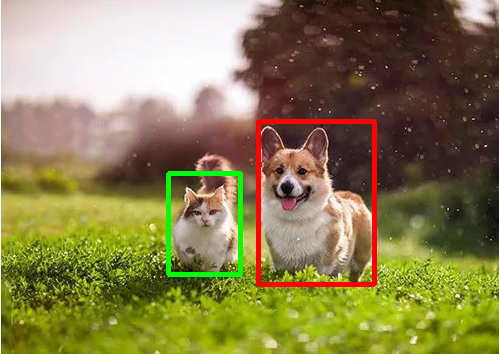

In [17]:
cv2_imshow(img_dog_cat)